In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
#Definir funções nlos e los utilizando variaveis aleatórias gaussianas
def SE_nlos(snr_dB,beta_dB):
    snr_linear = 10**(snr_dB/10)
    beta_linear = 10**(beta_dB/10)
    K = 2
    g = np.random.randn(K) + 1j*np.random.randn(K)
    h0 = np.sqrt(1/2)*g[0]
    h1 = np.sqrt(beta_linear/2)*g[1]
    sigma2 = 1/snr_linear
    a = (np.abs(h0)**2)/((np.abs(h1)**2) + (sigma2))
    return np.log2(1 + a)

#def SE_los(snr_dB,beta_dB):
#    snr_linear = 10**(snr_dB/10)
#    beta_linear = 10**(beta_dB/10)
#    h = np.sqrt(beta_linear)


In [58]:
beta = np.array([-30,-10])
snr_dB = np.linspace(-10,30,num=100)
mc = 1000
SE = np.zeros(mc)
r_10 = []
r_30 = []
for b in beta:
    for s in snr_dB:
        for i in range(mc):
            SE[i] = SE_nlos(s,b)
        if b==beta[1]:
            r_10.append(SE.mean())
        else:
            r_30.append(SE.mean())

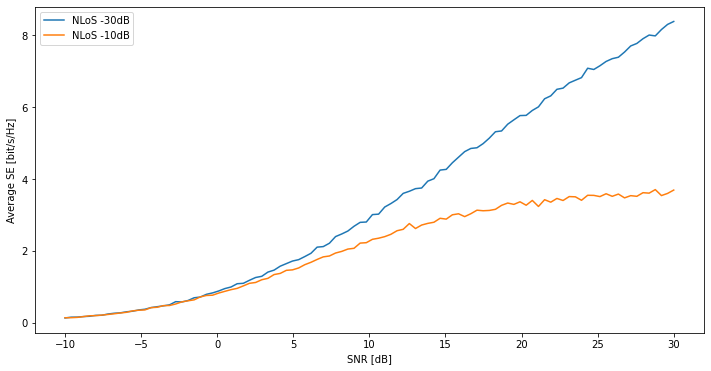

In [59]:
#Plot
plt.figure(figsize=(12,6))
plt.xlabel('SNR [dB]')
plt.ylabel('Average SE [bit/s/Hz]')
plt.plot(snr_dB, r_30, label= 'NLoS -30dB')
plt.plot(snr_dB, r_10, label= 'NLoS -10dB')
plt.legend()